In [76]:
#step1: set up the environment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
#step2: Import the data
df = pd.read_csv('data.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,age bracket,Purchased Bike
0,12496,M,F,"$40,000.00",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,MIDDLEAGE,No
1,24107,M,M,"$30,000.00",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,MIDDLEAGE,No
2,14177,M,M,"$80,000.00",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,OLD,No
3,24381,S,M,"$70,000.00",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,MIDDLEAGE,Yes
4,25597,S,M,"$30,000.00",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,MIDDLEAGE,Yes


In [78]:
#step3: learn more of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   object
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  age bracket       1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(10)
memory usage: 109.5+ KB


In [79]:
df.describe()

,ID,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,1.898000,1.442000,44.163000
std,5347.333948,1.628572,1.125123,11.364488
min,11000.000000,0.000000,0.000000,25.000000
25%,15290.750000,0.000000,1.000000,35.000000
50%,19744.000000,2.000000,1.000000,43.000000
75%,24470.750000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [80]:
df.shape

(1000, 14)

In [81]:
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

In [64]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'age bracket', 'Purchased Bike'],
      dtype='object')

In [65]:
#Performing data wrangling
#1. Exploratory Data Analysis
#2. Investigating outliers
#3 Making necessary corrections

In [66]:
#1. Exploratory Data Analysis

df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [89]:
print(df.isna().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
age bracket         0
Purchased Bike      0
dtype: int64


In [90]:
grouped_data = df.groupby('Age').agg({'Income': 'mean', 'Cars': 'mean'}).reset_index()

In [92]:
grouped_data.head()
df2=grouped_data

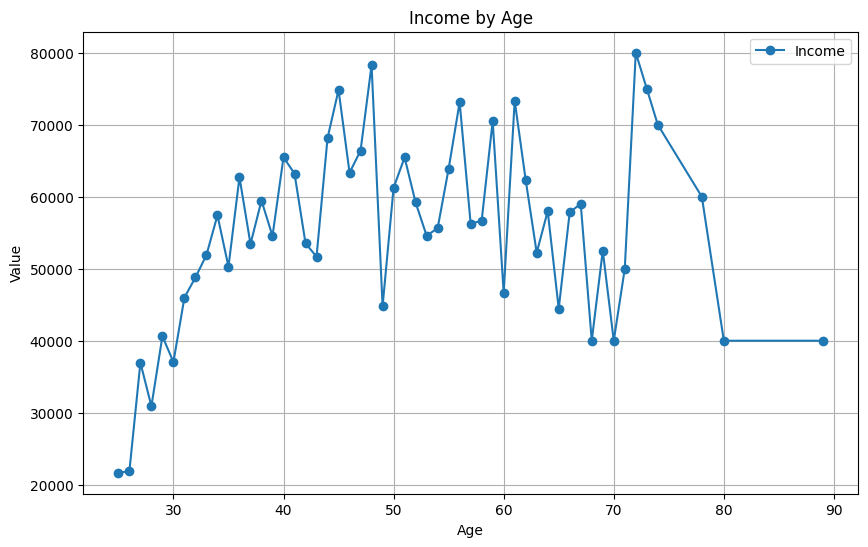

In [95]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Age'], df2['Income'], marker='o', label='Income')

# Adding titles and labels
plt.title('Income by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

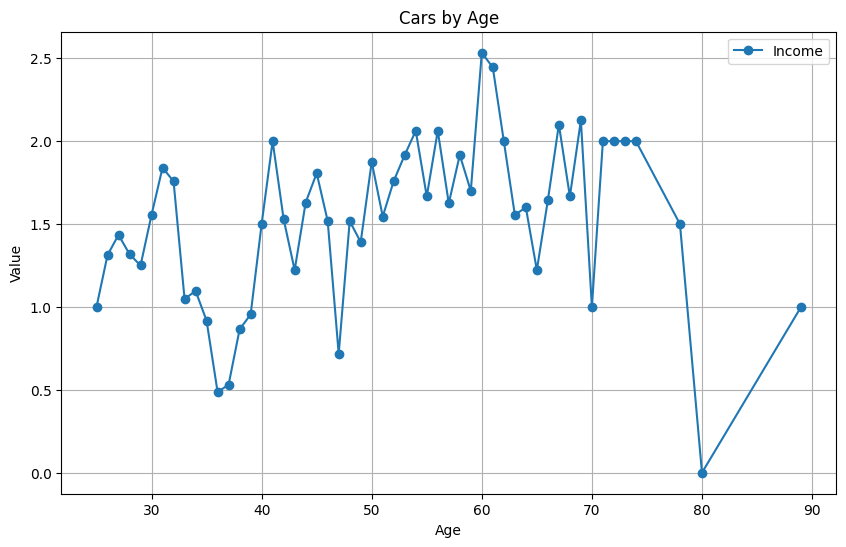

In [97]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Age'], df2['Cars'], marker='o', label='Income')

# Adding titles and labels
plt.title('Cars by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

<Axes: ylabel='Income'>

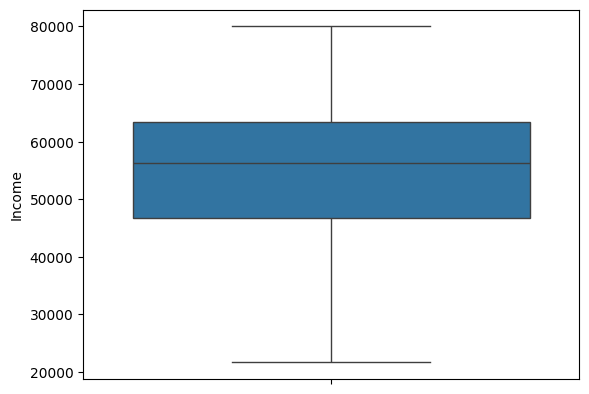

In [99]:
#Check Outliers

sns.boxplot(y='Income', data= df2)

<Axes: ylabel='Cars'>

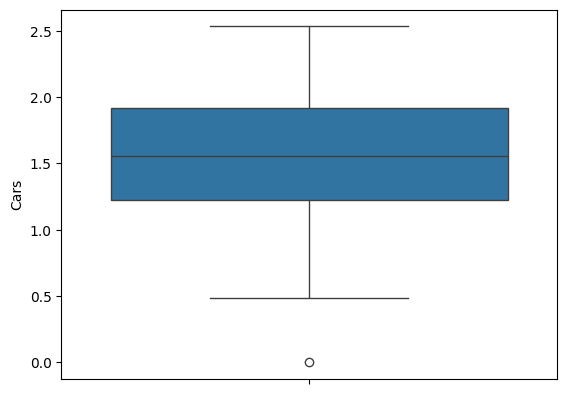

In [100]:
#Check Outliers

sns.boxplot(y='Cars', data= df2)

In [101]:
#Correcting the outlier

Q1 = df2['Cars'].quantile(0.25)
Q3 = df2['Cars'].quantile(0.75)
IQR = Q3-Q1

l_b = Q1-1.5*IQR
U_b = Q3-1.5*IQR

In [103]:
# Filter out outliers
df_filtered = df2[(df2['Cars'] >= l_b) & (df2['Cars'] <= U_b)]

<Axes: ylabel='Cars'>

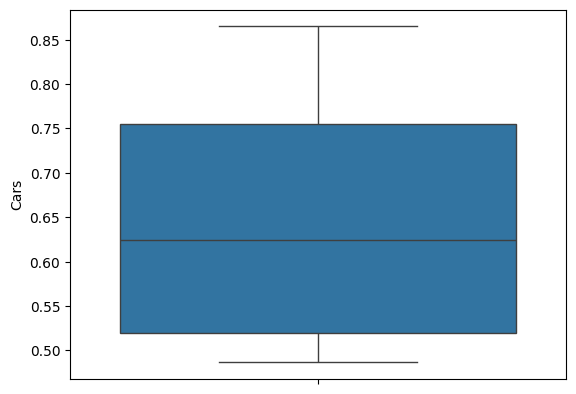

In [105]:
#Check Outliers

sns.boxplot(y='Cars', data= df_filtered)

In [106]:
#Correcting the outlier

Q1 = df2['Income'].quantile(0.25)
Q3 = df2['Income'].quantile(0.75)
IQR = Q3-Q1

l_b = Q1-1.5*IQR
U_b = Q3-1.5*IQR

In [107]:
# Filter out outliers
df_filtered = df2[(df2['Income'] >= l_b) & (df2['Income'] <= U_b)]

In [114]:
print("Filtered DataFrame:")
print(df_filtered)

Filtered DataFrame:
   Age        Income      Cars
0   25  21666.666667  1.000000
1   26  21875.000000  1.312500
2   27  36956.521739  1.434783
3   28  30909.090909  1.318182
5   30  37037.037037  1.555556


<Axes: ylabel='Income'>

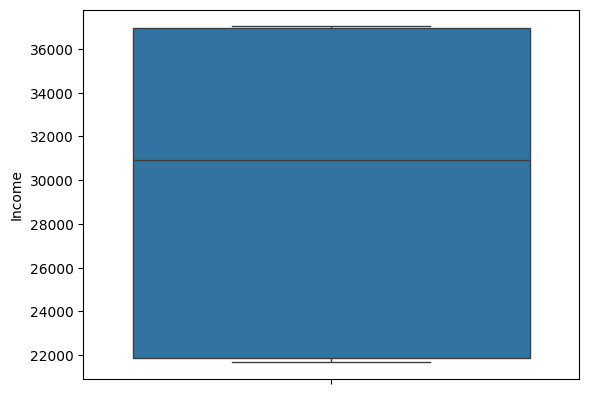

In [108]:
#Check Outliers

sns.boxplot(y='Income', data= df_filtered)

<Axes: xlabel='Income', ylabel='Count'>

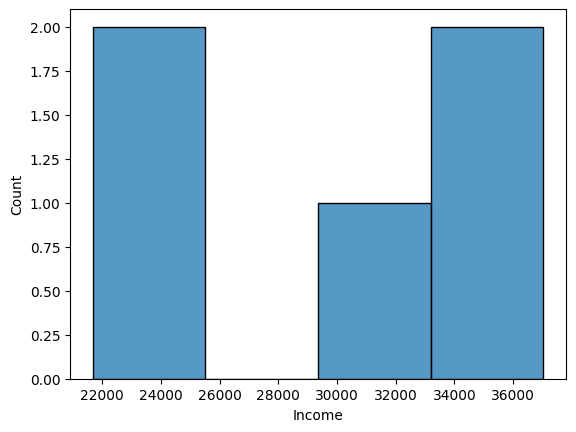

In [109]:
sns.histplot(df_filtered['Income'])

<Axes: xlabel='Cars', ylabel='Count'>

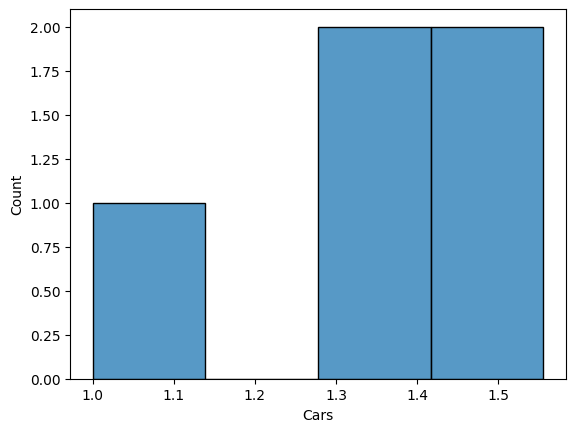

In [110]:
sns.histplot(df_filtered['Cars'])

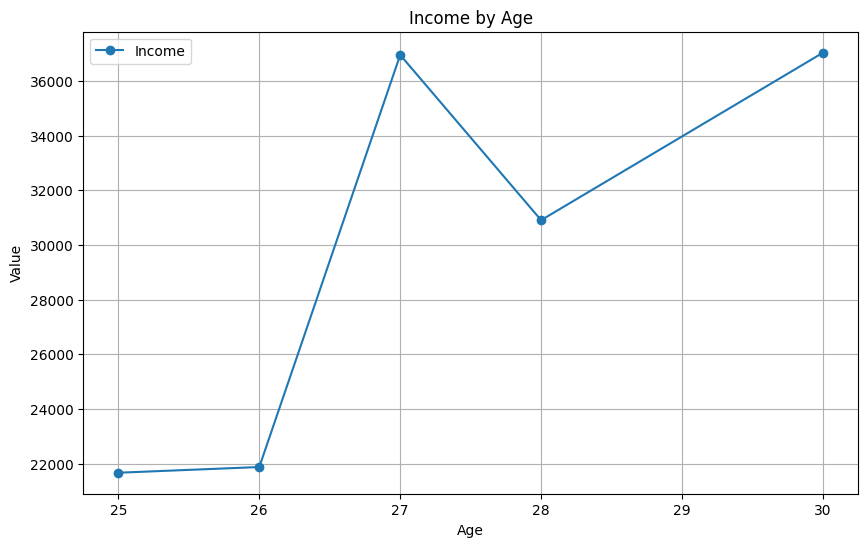

In [112]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Age'], df_filtered['Income'], marker='o', label='Income')

# Adding titles and labels
plt.title('Income by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

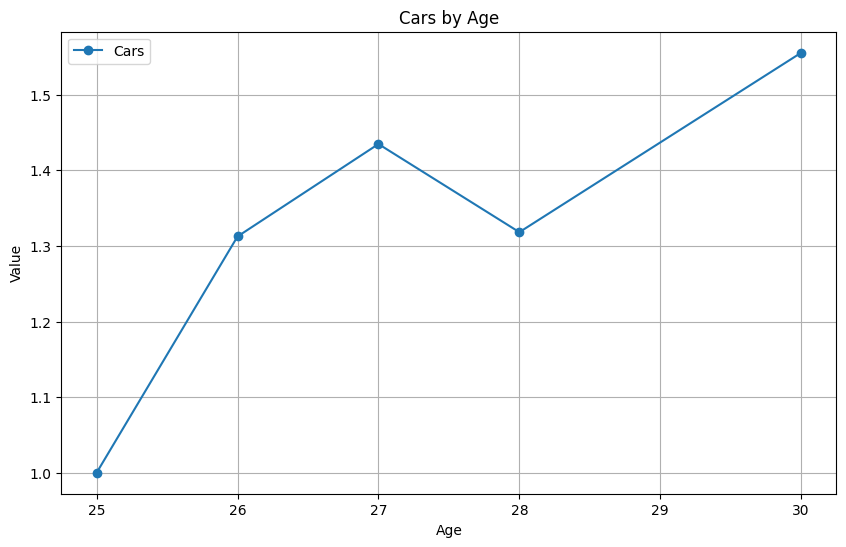

In [113]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Age'], df_filtered['Cars'], marker='o', label='Cars')

# Adding titles and labels
plt.title('Cars by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()